In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import precision_recall_fscore_support
from prettytable import PrettyTable
import warnings
import time
warnings.filterwarnings("ignore")

In [3]:
# load data
data = np.load('./data.npy',allow_pickle=True)

In [4]:
#game id
#embeddings gen by Resnet
#embeddings generated by VIT
#label name ground truth
# guess time

<h1>Exploratory Data Analysis</h1>

<p>Plotting graphs from the data to get some insights.</p>

In [5]:
# make a graph for visualizing the labels distributions
map_labels = {}
for i in data[:,3]:
    try:
        map_labels[i]+=1
    except:
        map_labels[i]=0

print(map_labels)
print(len(list(map_labels.keys())))

{'sleep': 5, 'oven': 1, 'chair': 20, 'igloo': 4, 'fish': 21, 'fishing': 12, 'radio': 13, 'flute': 25, 'tank': 4, 'keyboard': 11, 'notebook': 7, 'key': 18, 'sweater': 6, 'love': 17, 'pillow': 12, 'laptop': 14, 'sad': 7, 'cow': 12, 'stairs': 13, 'book': 7, 'clock': 16, 'hammer': 18, 'mouse': 14, 'call': 2, 'hard': 2, 'pant': 8, 'gym': 6, 'hit': 5, 'bucket': 15, 'knife': 14, 'cigarette': 8, 'rain': 12, 'snake': 23, 'comb': 9, 'catch': 3, 'tree': 19, 'brush': 12, 'butterfly': 17, 'cry': 3, 'slide': 3, 'calculator': 8, 'telephone': 10, 'rainy': 0, 'wheel': 16, 'cook': 2, 'bee': 6, 'ambulance': 8, 'drive': 3, 'lantern': 3, 'giraffe': 12, 'badminton': 9, 'bicycle': 5, 'sword': 6, 'bullet': 12, 'microwave': 1, 'airplane': 5, 'pencil': 8, 'bird': 6, 'stove': 7, 'starfish': 5, 'truck': 4, 'spoon': 9, 'plant': 6, 'television': 7, 'pear': 1, 'candle': 22, 'eraser': 4, 'sun': 23, 'lizard': 5, 'puppy': 3, 'parachute': 6, 'ladder': 21, 'car': 11, 'arrow': 15, 'close': 1, 'ant': 6, 'helicopter': 7, 'b

In [6]:
print(np.median(np.array(list(map_labels.values()))))

np.array(list(map_labels.values()))

5.0


array([ 5,  1, 20,  4, 21, 12, 13, 25,  4, 11,  7, 18,  6, 17, 12, 14,  7,
       12, 13,  7, 16, 18, 14,  2,  2,  8,  6,  5, 15, 14,  8, 12, 23,  9,
        3, 19, 12, 17,  3,  3,  8, 10,  0, 16,  2,  6,  8,  3,  3, 12,  9,
        5,  6, 12,  1,  5,  8,  6,  7,  5,  4,  9,  6,  7,  1, 22,  4, 23,
        5,  3,  6, 21, 11, 15,  1,  6,  7,  5,  6,  4,  9,  2,  3,  7,  3,
        2, 15,  7,  5,  7,  6,  1,  3,  4, 12,  8,  2, 11,  1,  6, 11,  6,
        8,  8,  5,  9, 10,  1,  3,  5,  5,  3,  3,  3,  4,  1,  8,  2,  3,
        9,  1,  5,  7,  2,  6, 17,  6,  8, 12,  3,  8,  2, 14,  7, 17,  9,
        3, 10, 18,  3, 10,  1,  9,  3,  3,  9,  7,  5,  4, 10,  1,  0,  6,
        2, 12,  5,  3,  2,  1, 17,  3,  6,  5,  3, 10,  1,  2,  1,  5,  2,
        4,  4,  3,  0,  6,  2,  2,  2,  2,  3,  1,  3,  2,  0,  3,  3,  1,
        1,  0,  2,  0,  0,  0])

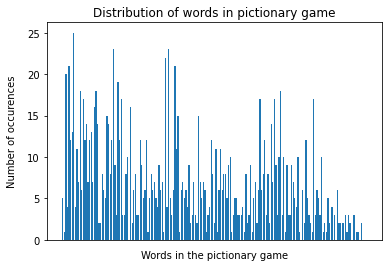

In [7]:
plt.bar(list(map_labels.keys()),list(map_labels.values()),align='center')
plt.xticks([])
plt.title('Distribution of words in pictionary game')
plt.xlabel('Words in the pictionary game',labelpad=10)
plt.ylabel('Number of occurences',labelpad=10)
plt.show()

In [8]:
# sorting the dictionary for getting insights on the most occuring words
map_labels = dict(sorted(map_labels.items(),key=lambda x : x[1],reverse=True))

In [9]:
print(map_labels)

{'flute': 25, 'snake': 23, 'sun': 23, 'candle': 22, 'fish': 21, 'ladder': 21, 'chair': 20, 'tree': 19, 'key': 18, 'hammer': 18, 'door': 18, 'love': 17, 'butterfly': 17, 'boat': 17, 'shoe': 17, 'rose': 17, 'clock': 16, 'wheel': 16, 'bucket': 15, 'arrow': 15, 'table': 15, 'laptop': 14, 'mouse': 14, 'knife': 14, 'pizza': 14, 'radio': 13, 'stairs': 13, 'fishing': 12, 'pillow': 12, 'cow': 12, 'rain': 12, 'brush': 12, 'giraffe': 12, 'bullet': 12, 'mug': 12, 'elephant': 12, 'bed': 12, 'keyboard': 11, 'car': 11, 'toothbrush': 11, 'shark': 11, 'telephone': 10, 'smile': 10, 'happy': 10, 'earth': 10, 'face': 10, 'fork': 10, 'comb': 9, 'badminton': 9, 'spoon': 9, 'toothpaste': 9, 'basket': 9, 'peacock': 9, 'grass': 9, 'tomato': 9, 'tent': 9, 'pant': 8, 'cigarette': 8, 'calculator': 8, 'ambulance': 8, 'pencil': 8, 'finger': 8, 'deer': 8, 'zip': 8, 'potato': 8, 'fire': 8, 'windmill': 8, 'notebook': 7, 'sad': 7, 'book': 7, 'stove': 7, 'television': 7, 'helicopter': 7, 'swim': 7, 'basketball': 7, 'cla

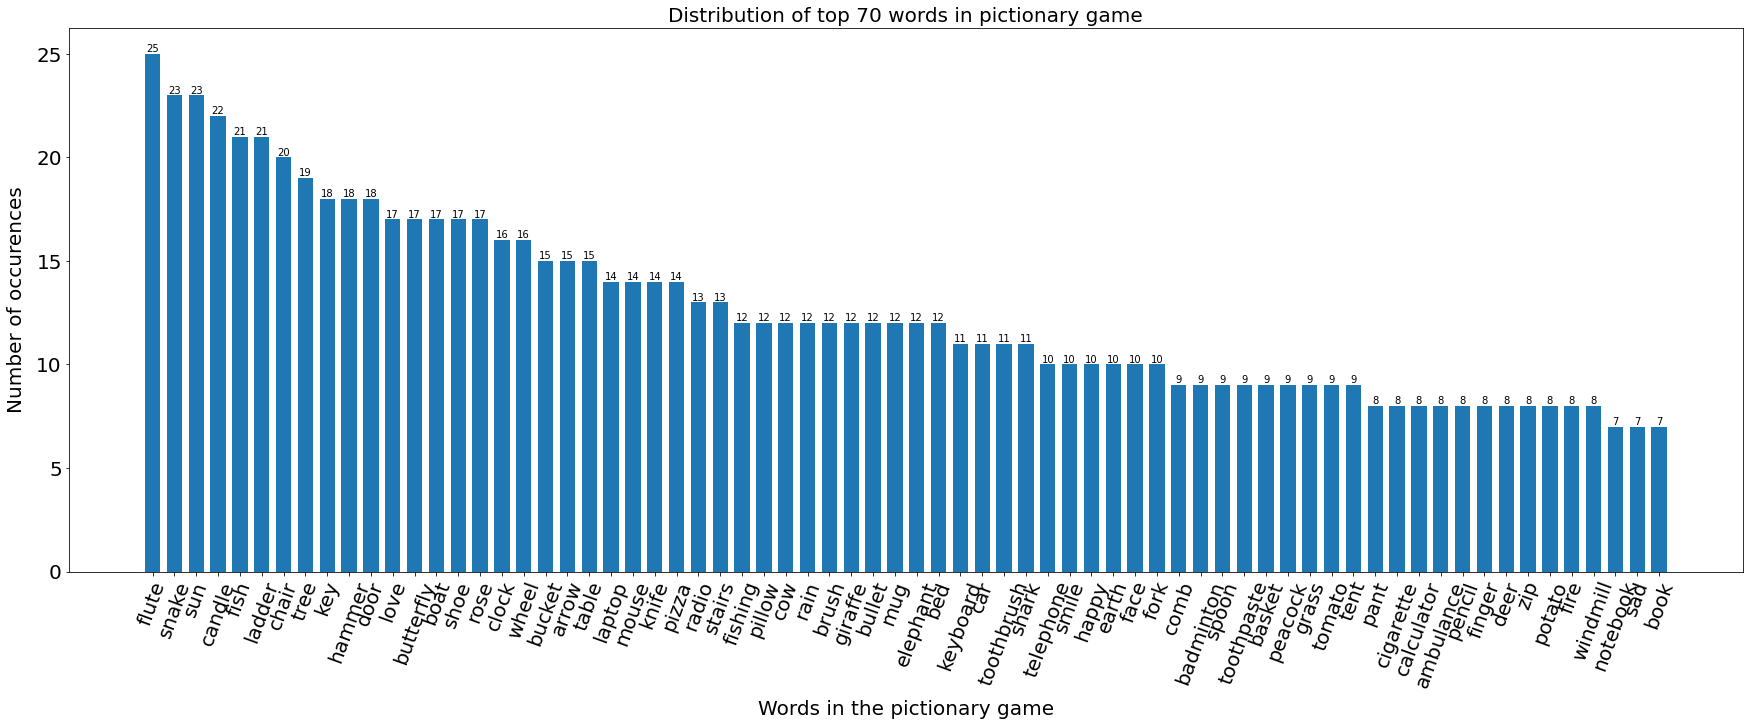

In [10]:
# suppose we need to see top 50 words
custom_viz = 70
# we want to see

plt.figure(figsize=(30,10))
bars = plt.bar(list(map_labels.keys())[:custom_viz],list(map_labels.values())[:custom_viz],align='center',width=0.7)
plt.xticks(rotation=70,fontsize=20)
plt.yticks(fontsize=20)
plt.title(f'Distribution of top {custom_viz} words in pictionary game',fontsize=20)
plt.bar_label(bars)
plt.xlabel('Words in the pictionary game',labelpad=10,fontsize=20)
plt.ylabel('Number of occurences',labelpad=10,fontsize=20)
plt.show()


In [11]:
print(data.shape)

(1500, 5)


In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(data=data)

In [14]:
df

,0,1,2,3,4
0,9f894201-9d0d-4f75-853b-595c0c1bd661,"[[-0.001002429, 0.047839083, -0.0046581626, 0....","[[0.31094703, 0.20213455, -0.16519593, -0.0530...",sleep,33.144312
1,d2b4d879-0345-4df1-a978-eb7f9e8b89f1,"[[-0.013190677, 0.08283211, 0.006474074, 0.001...","[[-0.07832227, -0.07557866, -0.05214904, -0.32...",oven,98.512848
2,aaf0c209-f3a7-4c91-9a09-bc1e30400c4c,"[[-0.010499587, 0.047467805, -0.019303396, -0....","[[0.31455985, -0.024428558, 0.33139282, 0.2197...",chair,15.449425
3,5ae313c7-9934-456c-9685-36ef20b712fd,"[[-0.023966337, 0.024375185, -0.0009961016, -0...","[[0.113364324, -0.23683439, 0.34781978, -0.427...",igloo,43.358541
4,b58bbb2c-461f-4805-856e-cba323f97e8c,"[[-0.018555297, 0.050565578, -0.008821793, 0.0...","[[0.22332864, -0.28626534, -0.037617087, -0.17...",fish,14.454734
...,...,...,...,...,...
1495,b1233fbb-68ee-44a0-a8b8-0b399ad1cacd,"[[0.009528579, 0.044194497, 0.038498692, -0.00...","[[0.10134661, -0.10768638, 0.23218037, 0.25022...",stove,53.772519
1496,76c1ee48-25b4-4981-b21f-26a3a2b091bb,"[[-0.003666563, 0.028779637, -0.013404611, -0....","[[0.29125518, -0.18452865, 0.1506041, 0.092724...",carrot,18.516855
1497,9596177d-b182-486e-bbc9-987081647e68,"[[0.00709543, 0.037197262, -0.022390455, 0.001...","[[0.19752023, 0.29306346, -0.28130922, -0.3879...",puppet,94.686575
1498,9ad40994-3c3b-46c0-81b4-05e81589856d,"[[0.009601502, 0.03150965, -0.010726368, 0.000...","[[0.3255903, -0.14218077, 0.0856628, 0.4351619...",listen,25.308092


In [15]:
df[0]

0       9f894201-9d0d-4f75-853b-595c0c1bd661
1       d2b4d879-0345-4df1-a978-eb7f9e8b89f1
2       aaf0c209-f3a7-4c91-9a09-bc1e30400c4c
3       5ae313c7-9934-456c-9685-36ef20b712fd
4       b58bbb2c-461f-4805-856e-cba323f97e8c
                        ...                 
1495    b1233fbb-68ee-44a0-a8b8-0b399ad1cacd
1496    76c1ee48-25b4-4981-b21f-26a3a2b091bb
1497    9596177d-b182-486e-bbc9-987081647e68
1498    9ad40994-3c3b-46c0-81b4-05e81589856d
1499    c3020795-fcda-42e7-bc6e-20658b0ede04
Name: 0, Length: 1500, dtype: object

In [16]:
df[0] = np.arange(0,data.shape[0])

In [17]:
df[0]

0          0
1          1
2          2
3          3
4          4
        ... 
1495    1495
1496    1496
1497    1497
1498    1498
1499    1499
Name: 0, Length: 1500, dtype: int64

In [18]:
df

,0,1,2,3,4
0,0,"[[-0.001002429, 0.047839083, -0.0046581626, 0....","[[0.31094703, 0.20213455, -0.16519593, -0.0530...",sleep,33.144312
1,1,"[[-0.013190677, 0.08283211, 0.006474074, 0.001...","[[-0.07832227, -0.07557866, -0.05214904, -0.32...",oven,98.512848
2,2,"[[-0.010499587, 0.047467805, -0.019303396, -0....","[[0.31455985, -0.024428558, 0.33139282, 0.2197...",chair,15.449425
3,3,"[[-0.023966337, 0.024375185, -0.0009961016, -0...","[[0.113364324, -0.23683439, 0.34781978, -0.427...",igloo,43.358541
4,4,"[[-0.018555297, 0.050565578, -0.008821793, 0.0...","[[0.22332864, -0.28626534, -0.037617087, -0.17...",fish,14.454734
...,...,...,...,...,...
1495,1495,"[[0.009528579, 0.044194497, 0.038498692, -0.00...","[[0.10134661, -0.10768638, 0.23218037, 0.25022...",stove,53.772519
1496,1496,"[[-0.003666563, 0.028779637, -0.013404611, -0....","[[0.29125518, -0.18452865, 0.1506041, 0.092724...",carrot,18.516855
1497,1497,"[[0.00709543, 0.037197262, -0.022390455, 0.001...","[[0.19752023, 0.29306346, -0.28130922, -0.3879...",puppet,94.686575
1498,1498,"[[0.009601502, 0.03150965, -0.010726368, 0.000...","[[0.3255903, -0.14218077, 0.0856628, 0.4351619...",listen,25.308092


In [19]:
df[1]

0       [[-0.001002429, 0.047839083, -0.0046581626, 0....
1       [[-0.013190677, 0.08283211, 0.006474074, 0.001...
2       [[-0.010499587, 0.047467805, -0.019303396, -0....
3       [[-0.023966337, 0.024375185, -0.0009961016, -0...
4       [[-0.018555297, 0.050565578, -0.008821793, 0.0...
                              ...                        
1495    [[0.009528579, 0.044194497, 0.038498692, -0.00...
1496    [[-0.003666563, 0.028779637, -0.013404611, -0....
1497    [[0.00709543, 0.037197262, -0.022390455, 0.001...
1498    [[0.009601502, 0.03150965, -0.010726368, 0.000...
1499    [[-0.006722372, 0.051088452, -0.006071057, 0.0...
Name: 1, Length: 1500, dtype: object

In [20]:
#return a series object

df.loc[:,2]

0       [[0.31094703, 0.20213455, -0.16519593, -0.0530...
1       [[-0.07832227, -0.07557866, -0.05214904, -0.32...
2       [[0.31455985, -0.024428558, 0.33139282, 0.2197...
3       [[0.113364324, -0.23683439, 0.34781978, -0.427...
4       [[0.22332864, -0.28626534, -0.037617087, -0.17...
                              ...                        
1495    [[0.10134661, -0.10768638, 0.23218037, 0.25022...
1496    [[0.29125518, -0.18452865, 0.1506041, 0.092724...
1497    [[0.19752023, 0.29306346, -0.28130922, -0.3879...
1498    [[0.3255903, -0.14218077, 0.0856628, 0.4351619...
1499    [[0.323996, 0.3701325, 0.53706473, -0.02763263...
Name: 2, Length: 1500, dtype: object

In [21]:
df.loc[:,2]

0       [[0.31094703, 0.20213455, -0.16519593, -0.0530...
1       [[-0.07832227, -0.07557866, -0.05214904, -0.32...
2       [[0.31455985, -0.024428558, 0.33139282, 0.2197...
3       [[0.113364324, -0.23683439, 0.34781978, -0.427...
4       [[0.22332864, -0.28626534, -0.037617087, -0.17...
                              ...                        
1495    [[0.10134661, -0.10768638, 0.23218037, 0.25022...
1496    [[0.29125518, -0.18452865, 0.1506041, 0.092724...
1497    [[0.19752023, 0.29306346, -0.28130922, -0.3879...
1498    [[0.3255903, -0.14218077, 0.0856628, 0.4351619...
1499    [[0.323996, 0.3701325, 0.53706473, -0.02763263...
Name: 2, Length: 1500, dtype: object

In [22]:
df

,0,1,2,3,4
0,0,"[[-0.001002429, 0.047839083, -0.0046581626, 0....","[[0.31094703, 0.20213455, -0.16519593, -0.0530...",sleep,33.144312
1,1,"[[-0.013190677, 0.08283211, 0.006474074, 0.001...","[[-0.07832227, -0.07557866, -0.05214904, -0.32...",oven,98.512848
2,2,"[[-0.010499587, 0.047467805, -0.019303396, -0....","[[0.31455985, -0.024428558, 0.33139282, 0.2197...",chair,15.449425
3,3,"[[-0.023966337, 0.024375185, -0.0009961016, -0...","[[0.113364324, -0.23683439, 0.34781978, -0.427...",igloo,43.358541
4,4,"[[-0.018555297, 0.050565578, -0.008821793, 0.0...","[[0.22332864, -0.28626534, -0.037617087, -0.17...",fish,14.454734
...,...,...,...,...,...
1495,1495,"[[0.009528579, 0.044194497, 0.038498692, -0.00...","[[0.10134661, -0.10768638, 0.23218037, 0.25022...",stove,53.772519
1496,1496,"[[-0.003666563, 0.028779637, -0.013404611, -0....","[[0.29125518, -0.18452865, 0.1506041, 0.092724...",carrot,18.516855
1497,1497,"[[0.00709543, 0.037197262, -0.022390455, 0.001...","[[0.19752023, 0.29306346, -0.28130922, -0.3879...",puppet,94.686575
1498,1498,"[[0.009601502, 0.03150965, -0.010726368, 0.000...","[[0.3255903, -0.14218077, 0.0856628, 0.4351619...",listen,25.308092


In [23]:
data.shape

(1500, 5)

In [24]:
# chnging the 0th column to a unique index
data[:,0] = np.arange(0,data.shape[0])

In [25]:
data[:,0]

array([0, 1, 2, ..., 1497, 1498, 1499], dtype=object)

In [26]:
# similarly for 1st column and 2nd column reshape to a single vector dimension

In [27]:
data[:,1] = np.array(data[:,1])

In [28]:
data[:,1].shape

(1500,)

In [29]:
for i in range(data[:,1].shape[0]):
    data[:,1][i] = data[:,1][i].flatten()

# if we do arr in data[:,1], it does'nt work not passing by reference

In [30]:
data[:,1][0].shape

(1024,)

In [31]:
for i in range(data[:,2].shape[0]):
    data[:,2][i] = data[:,2][i].flatten()

# if we do arr in data[:,1], it does'nt work not passing by reference

In [32]:
data[:,2][0].shape

(512,)

In [33]:
data = data[:,:4]
np.save('pre-processed_data.npy',data)

-----------------------------------------------------All the Data Pre processing done now-------------------------------------------------

In [34]:
# load data
data = np.load('pre-processed_data.npy',allow_pickle=True)

In [35]:
print(data.shape)

(1500, 4)


In [36]:
df = pd.DataFrame(data=data)

In [37]:
df

,0,1,2,3
0,0,"[-0.001002429, 0.047839083, -0.0046581626, 0.0...","[0.31094703, 0.20213455, -0.16519593, -0.05306...",sleep
1,1,"[-0.013190677, 0.08283211, 0.006474074, 0.0013...","[-0.07832227, -0.07557866, -0.05214904, -0.321...",oven
2,2,"[-0.010499587, 0.047467805, -0.019303396, -0.0...","[0.31455985, -0.024428558, 0.33139282, 0.21973...",chair
3,3,"[-0.023966337, 0.024375185, -0.0009961016, -0....","[0.113364324, -0.23683439, 0.34781978, -0.4273...",igloo
4,4,"[-0.018555297, 0.050565578, -0.008821793, 0.00...","[0.22332864, -0.28626534, -0.037617087, -0.175...",fish
...,...,...,...,...
1495,1495,"[0.009528579, 0.044194497, 0.038498692, -0.000...","[0.10134661, -0.10768638, 0.23218037, 0.250226...",stove
1496,1496,"[-0.003666563, 0.028779637, -0.013404611, -0.0...","[0.29125518, -0.18452865, 0.1506041, 0.0927248...",carrot
1497,1497,"[0.00709543, 0.037197262, -0.022390455, 0.0012...","[0.19752023, 0.29306346, -0.28130922, -0.38795...",puppet
1498,1498,"[0.009601502, 0.03150965, -0.010726368, 0.0008...","[0.3255903, -0.14218077, 0.0856628, 0.43516198...",listen


In [38]:
# Data split for train ,val and test

# Lets make a split of 65 % train , 20 % val, 15 % test

train = int(0.8*data.shape[0])
val = int(0.2*data.shape[0])
test = int(0*data.shape[0])

In [39]:
# np.random.shuffle(data)
# data.shape

In [40]:
df = pd.DataFrame(data=data)

In [41]:
df

,0,1,2,3
0,0,"[-0.001002429, 0.047839083, -0.0046581626, 0.0...","[0.31094703, 0.20213455, -0.16519593, -0.05306...",sleep
1,1,"[-0.013190677, 0.08283211, 0.006474074, 0.0013...","[-0.07832227, -0.07557866, -0.05214904, -0.321...",oven
2,2,"[-0.010499587, 0.047467805, -0.019303396, -0.0...","[0.31455985, -0.024428558, 0.33139282, 0.21973...",chair
3,3,"[-0.023966337, 0.024375185, -0.0009961016, -0....","[0.113364324, -0.23683439, 0.34781978, -0.4273...",igloo
4,4,"[-0.018555297, 0.050565578, -0.008821793, 0.00...","[0.22332864, -0.28626534, -0.037617087, -0.175...",fish
...,...,...,...,...
1495,1495,"[0.009528579, 0.044194497, 0.038498692, -0.000...","[0.10134661, -0.10768638, 0.23218037, 0.250226...",stove
1496,1496,"[-0.003666563, 0.028779637, -0.013404611, -0.0...","[0.29125518, -0.18452865, 0.1506041, 0.0927248...",carrot
1497,1497,"[0.00709543, 0.037197262, -0.022390455, 0.0012...","[0.19752023, 0.29306346, -0.28130922, -0.38795...",puppet
1498,1498,"[0.009601502, 0.03150965, -0.010726368, 0.0008...","[0.3255903, -0.14218077, 0.0856628, 0.43516198...",listen


In [42]:
train_data = data[:train]
val_data = data[train:val+train]
test_data = data[train+val:train+val+test]

In [43]:
train_data.shape

(1200, 4)

In [44]:
test_data.shape

(0, 4)

In [45]:
val_data.shape

(300, 4)

<h1>KNN Model</h1>

<p>The description of KNN model and its hyperparameters.</p>

<h1>Best and Optimized KNN Model</h1>

In [51]:
class Distance():
    def __init__(self,k,dm):
        self.distance_metric_set = dm
        pass

    def Euclidean(self,v1,v2):
        return np.sqrt(np.sum((v1-v2)**2,axis=1))
    
    def Manhatten(self,v1,v2):
        return np.sum(np.abs(v1-v2),axis=1)
    
    def Cosine(self,v1,v2):
        return 1 - (np.dot(v1,v2)/(np.linalg.norm(v1,axis=1)*\
            np.linalg.norm(v2)))

mapper_lbl = {k:v for k,v in enumerate(list(np.unique(data[:,-1].flatten())),start=1)}
mapper_lbl_rev = {v:k for k,v in enumerate(list(np.unique(data[:,-1].flatten())),start=1)}


class KNNModel(Distance):
    
    mp_lbl = mapper_lbl
    mp_lbl_rev = mapper_lbl_rev
    
    def __init__(self,k,dm,enc_type,data):
        self.k = k
        self.data = data
        self.samples = data.shape[0]
        self.encoder_type=enc_type
        self.distance_metric = self.distance_metric_finder(dm)
        self.mapper_str_to_int_vectorize = np.vectorize(self.mapper_str_to_int)
                
    def distance_metric_finder(self,dm):
        if dm.lower() == "manhatten":
            return self.Manhatten
        if dm.lower() == "euclidean":
            return self.Euclidean
        if dm.lower() == "cosine":
            return self.Cosine
    
    def mapper_str_to_int(self,label):
        return KNNModel.mp_lbl_rev[label]


    def inference(self,test_samples):
        return_list = []
        
        collection_of_vectors = np.stack(self.data[:,self.encoder_type])
        for test_smpl in test_samples[:,self.encoder_type]:
            
            distances = self.distance_metric(collection_of_vectors,test_smpl)
            labels = self.mapper_str_to_int_vectorize(self.data[:,3])
            
            top_k = np.column_stack((distances, labels))
            
            top_k = top_k[np.argsort(distances)]
            top_k = top_k[:self.k]
            top_k = np.array(top_k)

            unique, counts = np.unique(top_k[:,1], return_counts=True)
            max_freq_count = np.max(counts)
            max_freq_labels = unique[counts == max_freq_count]
            resultant_shortlisted_neighbors = top_k[np.isin(top_k[:, 1], max_freq_labels)]
            return_list.append(resultant_shortlisted_neighbors[np.argmin(resultant_shortlisted_neighbors[:,0])][1])
            
        return return_list
    
    def validation_metrics_table(self,y_true,y_pred):
        a_macro = precision_recall_fscore_support(y_true,y_pred,average='macro')
        a_micro = precision_recall_fscore_support(y_true,y_pred,average='micro')
        a_weighted = precision_recall_fscore_support(y_true,y_pred,average='weighted')

        y_true = np.array(y_true)
        y_pred = np.array(y_pred)

        myTable = PrettyTable(["Type","Accuracy","Precision","Recall","F1 - Score"])
        accuracy = round(np.sum(y_pred==y_true)/y_pred.shape[0],3)
        myTable.add_row(["Macro",accuracy,round(a_macro[0],3),round(a_macro[1],3),round(a_macro[2],3)])
        myTable.add_row(["Micro",accuracy,round(a_micro[0],3),round(a_micro[1],3),round(a_micro[2],3)])
        myTable.add_row(["Weighted",accuracy,round(a_weighted[0],3),round(a_weighted[1],3),round(a_weighted[2],3)])

        return myTable

Now, the data is split into 3 parts.

<h2>Max accuracy on Validation set of Model</h2>

In [52]:
# Tuning the hyperparameters k,encoder_type,distance_metric
"""
Possibilities : 

K  = root(sizeof_train_set)
Encoder_type = 2
Distance_metric = 3
"""
L = []
max_accuracy = 0
count=0

for encoder_type in range(1,3):
    for distance_metric in ["euclidean","manhatten","cosine"]:
        for k in range(1,int(math.sqrt(train_data.shape[0])+1)):
            accuracy = 0 
            model = KNNModel(k,distance_metric,encoder_type,train_data)
            outputs = model.inference(val_data)
            accuracy+=np.sum(outputs==model.mapper_str_to_int_vectorize(val_data[:,3]))
            accuracy/=val_data.shape[0]
            accuracy = round(accuracy,3)
            L.append([accuracy,(k,encoder_type,distance_metric)])
            if accuracy > max_accuracy:
                max_accuracy = accuracy
                good_triplet = (k,encoder_type,distance_metric)
            count+=1

print(f"max_accuracy = {max_accuracy} and best triplet = {good_triplet}")

max_accuracy = 0.307 and best triplet = (8, 2, 'euclidean')


<h2>Table of Top - 20 best Hyperparameters</h2>

In [53]:

myTable = PrettyTable(["Rank","k-NN","Encoder","Distance_metric","Accuracy"])

# making a ranklist
L.sort(reverse=True)
encoder_name = ""

sample = L[:20]

for i in range(20):
    
    # encoder type
    if sample[i][1][1] == 1:
        encoder_name = "ResNet"
    else:
        encoder_name = "VIT"
    
    myTable.add_row([i+1,sample[i][1][0],encoder_name,sample[i][1][2],f"{round(sample[i][0]*100,3)}%"])

print(myTable)



+------+------+---------+-----------------+----------+
| Rank | k-NN | Encoder | Distance_metric | Accuracy |
+------+------+---------+-----------------+----------+
|  1   |  10  |   VIT   |    euclidean    |  30.7%   |
|  2   |  9   |   VIT   |    euclidean    |  30.7%   |
|  3   |  8   |   VIT   |    euclidean    |  30.7%   |
|  4   |  8   |   VIT   |    manhatten    |  30.3%   |
|  5   |  9   |   VIT   |      cosine     |  30.0%   |
|  6   |  9   |   VIT   |    manhatten    |  29.7%   |
|  7   |  7   |   VIT   |    manhatten    |  29.7%   |
|  8   |  6   |   VIT   |    manhatten    |  29.7%   |
|  9   |  11  |   VIT   |    manhatten    |  29.3%   |
|  10  |  10  |   VIT   |      cosine     |  29.3%   |
|  11  |  18  |   VIT   |    manhatten    |  29.0%   |
|  12  |  17  |   VIT   |    manhatten    |  29.0%   |
|  13  |  14  |   VIT   |    manhatten    |  29.0%   |
|  14  |  11  |   VIT   |    euclidean    |  29.0%   |
|  15  |  11  |   VIT   |      cosine     |  29.0%   |
|  16  |  

<h2>Printing precision, recall and f1-score for validation set of Best Model</h2>

In [54]:
# Calculating the above metrics for the best model

model = KNNModel(10,"euclidean",2,train_data)
y_pred = []
y_true = []

outputs = model.inference(val_data)
y_pred = outputs
y_true = model.mapper_str_to_int_vectorize(val_data[:,3])

In [55]:
model.validation_metrics_table(y_true,y_pred)

Type,Accuracy,Precision,Recall,F1 - Score
Macro,0.307,0.215,0.209,0.189
Micro,0.307,0.307,0.307,0.307
Weighted,0.307,0.354,0.307,0.288


<h2>Plot a Accuracy vs K graph for the best model hyperparameters (others)</h2>

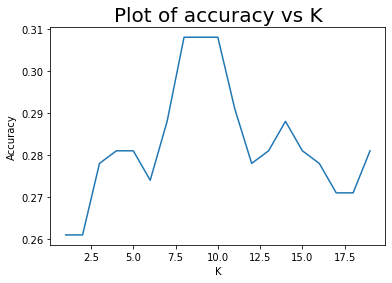

In [58]:
"""
I want to plot on the best model hyperparameters of encoder_type and distance_metric pair 
varying its k
"""
acc_arr = []
for k in range(1,20):
    model= KNNModel(k,"euclidean",2,train_data)
    outputs = model.inference(val_data)
    accuracy+=np.sum(outputs==model.mapper_str_to_int_vectorize(val_data[:,3]))
    
    accuracy/=val_data.shape[0]
    accuracy = round(accuracy,3)
    acc_arr.append(accuracy)

plt.title("Plot of accuracy vs K",fontsize=20)
plt.xlabel("K",fontsize=10)
plt.ylabel("Accuracy",fontsize=10)
plt.plot(np.arange(1,20,1),acc_arr)

plt.show()

<h2>Plot of Inference vs Time</h2>

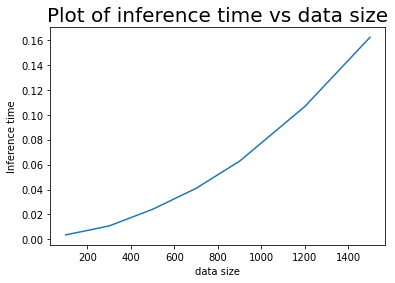

In [61]:
data_size = [100, 300, 500, 700, 900 , 1200 , 1500]
time_per_k = []



for size in data_size:
    dat = data[:size]
    
    train = int(0.8*dat.shape[0])
    val = int(0.2*dat.shape[0])
    test = int(0*dat.shape[0])
    
    train_data = dat[:train]
    val_data = dat[train:val+train]
    test_data = dat[train+val:train+val+test]
    
    knn = KNNModel(8,"euclidean",2,train_data)
    
    start_time = time.time()
    knn.inference(val_data)
    end_time = time.time()
    execution_time = end_time - start_time
    time_per_k.append(execution_time)

plt.title("Plot of inference time vs data size",fontsize=20)
plt.xlabel("data size",fontsize=10)
plt.ylabel("Inference time",fontsize=10)
plt.plot(data_size,time_per_k)

plt.show()

In [62]:
!pip install scikit-multilearn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


<h1>Decision Tree</h1>

<h2>Data Analysis</h2>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

In [64]:
df = pd.read_csv('./advertisement.csv')

In [65]:
df.head(20)

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item,labels
0,45,Male,61271.953359,Master,False,3,Lake Sheila,Doctor,87.697118,monitor,electronics clothing sports
1,24,Female,53229.101074,High School,False,1,Crystalburgh,Businessman,115.135586,lipstick,furniture beauty
2,45,Female,30066.046684,Bachelor,True,3,Margaretburgh,Engineer,101.694559,biscuits,clothing electronics food sports
3,19,Male,48950.246384,PhD,False,0,Williamshaven,Lawyer,97.964887,maggi,food
4,29,Female,44792.627094,Master,False,0,New Paul,Businessman,86.847281,carpet,home
5,20,Female,51266.767047,Master,True,3,Frankport,Scientist,95.145103,laptop,sports electronics books
6,27,Male,29578.136416,Bachelor,True,3,North Shelbyshire,Lawyer,69.022842,table,beauty furniture clothing
7,20,Female,35325.309005,PhD,False,3,South Raventown,Housewife,110.564517,dictionary,books beauty
8,51,Male,40232.564356,PhD,True,0,Leonardtown,Salesman,107.835490,curtains,electronics food home sports
9,19,Male,48053.583882,PhD,True,0,South Susan,Artist,108.854898,chips,furniture food


In [66]:
df.size

11000

In [67]:
np_ds = np.array(df)

In [68]:
np_ds[0]

array([45, 'Male', 61271.953358890096, 'Master', False, 3, 'Lake Sheila',
       'Doctor', 87.69711834242366, 'monitor',
       'electronics clothing sports'], dtype=object)

In [69]:
unique_labels  = set()

for arr in np_ds:
    lbl_str = arr[-1].split(' ')
    for lbl in lbl_str:
        unique_labels.add(lbl)

print(unique_labels)

{'clothing', 'beauty', 'electronics', 'furniture', 'sports', 'books', 'food', 'home'}


In [70]:
df[df["gender"]=="Female"].head(50)

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item,labels
1,24,Female,53229.101074,High School,False,1,Crystalburgh,Businessman,115.135586,lipstick,furniture beauty
2,45,Female,30066.046684,Bachelor,True,3,Margaretburgh,Engineer,101.694559,biscuits,clothing electronics food sports
4,29,Female,44792.627094,Master,False,0,New Paul,Businessman,86.847281,carpet,home
5,20,Female,51266.767047,Master,True,3,Frankport,Scientist,95.145103,laptop,sports electronics books
7,20,Female,35325.309005,PhD,False,3,South Raventown,Housewife,110.564517,dictionary,books beauty
10,57,Female,60907.844629,PhD,True,0,Gutierrezborough,HR,78.831675,shoes,clothing home
11,27,Female,51033.627935,PhD,True,2,Lake Tiffanyhaven,Scientist,138.672618,maggi,food books
13,44,Female,34683.652618,Master,True,2,West Darlenemouth,Engineer,89.101465,bat,sports furniture food home
14,51,Female,48815.172160,Bachelor,False,0,New Anthonytown,Salesman,65.797622,biscuits,beauty clothing food
15,42,Female,40527.463149,High School,False,2,Markfurt,Engineer,101.597316,gloves,books clothing sports


In [71]:
female_df = df[df["gender"]=="Female"]

In [72]:
np_ds_female = np.array(female_df)

map_labels1 = {}

for arr in np_ds_female:
    lbl_str = arr[-1].split(' ')
    for lbl in lbl_str:
        try:
            map_labels1[lbl]+=1
        except:
            map_labels1[lbl]=1

print(map_labels1)

{'furniture': 179, 'beauty': 183, 'clothing': 162, 'electronics': 147, 'food': 173, 'sports': 183, 'home': 172, 'books': 177}


In [73]:
np_ds_female.shape

(506, 11)

In [74]:
print(sum(list(map_labels1.values())))

1376


In [75]:
male_df = df[df["gender"]=="Male"]

In [76]:
np_ds_male = np.array(male_df)

map_labels2 = {}

for arr in np_ds_male:
    lbl_str = arr[-1].split(' ')
    for lbl in lbl_str:
        try:
            map_labels2[lbl]+=1
        except:
            map_labels2[lbl]=1

print(map_labels2)

{'electronics': 185, 'clothing': 172, 'sports': 179, 'food': 170, 'beauty': 173, 'furniture': 157, 'home': 168, 'books': 178}


In [77]:
print(sum(list(map_labels2.values())))

1382


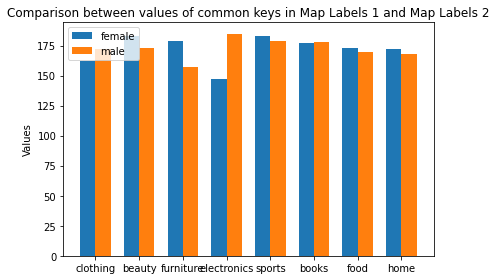

In [78]:

# Find common keys
common_keys = set(map_labels1.keys()) & set(map_labels2.keys())

# Prepare data for plotting
values1 = [map_labels1[key] for key in common_keys]
values2 = [map_labels2[key] for key in common_keys]

# Plotting
import matplotlib.pyplot as plt
import numpy as np

# Setting up the x-axis positions
x = np.arange(len(common_keys))

# Setting up the width for bars
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values1, width, label='female')
rects2 = ax.bar(x + width/2, values2, width, label='male')

# Adding labels, title, and legend
ax.set_ylabel('Values')
ax.set_title('Comparison between values of common keys in Map Labels 1 and Map Labels 2')
ax.set_xticks(x)
ax.set_xticklabels(common_keys)
ax.legend()

fig.tight_layout()
plt.show()

<h2>Dataset Splitting and Qualitative feature handling</h2>

In [79]:
# Splitting  the train val test split
# keeping the ration 70 : 15 : 15
test = 0.00
val = 0.20
train = 0.80

df = pd.read_csv('./advertisement.csv')
data = np.array(df)

In [80]:
print(data.shape)

(1000, 11)


<h2>Using LabelEncoder Routine to encode the categorical features</h2>

In [81]:
"""
We can see column : 1,3,4,6,7,9 are categorical , hence need to be encoded.
"""

for column in [1,3,4,6,7,9]:
    label_encode = LabelEncoder()
    encoded_feature = label_encode.fit_transform(data[:,column])
    data[:,column] = encoded_feature

In [82]:
print(data.shape)

(1000, 11)


<h2>Using the MultiLabelBinarizer Routine to encode the Categorical labels</h2>

In [83]:
label_encode_mlb = MultiLabelBinarizer()

formatted_list = []

for lbl_string in data[:,-1]:
    formatted_list.append(lbl_string.split(' '))
    
encoded_labels = label_encode_mlb.fit_transform(formatted_list)
    
train_x,train_y = data[:int(train*data.shape[0]),:-1],encoded_labels[:int(train*data.shape[0])]
val_x,val_y = data[int(train*data.shape[0]):int(train*data.shape[0])+int(val*data.shape[0]),:-1],encoded_labels[int(train*data.shape[0]):int(train*data.shape[0])+int(val*data.shape[0])]
test_x,test_y = data[int(train*data.shape[0])+int(val*data.shape[0]):int(train*data.shape[0])+int(val*data.shape[0])+int(test*data.shape[0]),:-1],encoded_labels[int(train*data.shape[0])+int(val*data.shape[0]):int(train*data.shape[0])+int(val*data.shape[0])+int(test*data.shape[0])]

print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)
print(val_x.shape,val_y.shape)

(800, 10) (800, 8)
(0, 10) (0, 8)
(200, 10) (200, 8)


In [84]:
label_encode.classes_

array(['ball', 'bat', 'bed', 'biscuits', 'carpet', 'chair', 'chips',
       'cream', 'curtains', 'dictionary', 'encyclopedia', 'gloves',
       'laptop', 'lipstick', 'maggi', 'mobile', 'monitor', 'novel',
       'pants', 'perfume', 'shirt', 'shoes', 'sofa', 'table'],
      dtype=object)

<h2>Dataset dimensions and Split dimensions</h2>

In [85]:
print(train_x.shape,train_y.shape)
print(val_x.shape,val_y.shape)
print(test_y.shape,test_y.shape)

(800, 10) (800, 8)
(200, 10) (200, 8)
(0, 8) (0, 8)


In [86]:
print(train_x)

[[45 1 61271.953358890096 ... 2 87.69711834242366 16]
 [24 0 53229.101073561775 ... 1 115.13558622549095 13]
 [45 0 30066.04668359846 ... 3 101.69455857438264 3]
 ...
 [27 0 47421.56230052875 ... 6 105.39355919621828 23]
 [22 1 49441.02540676641 ... 6 124.51563837634951 23]
 [53 0 27143.854626541364 ... 0 144.55678076749234 18]]


<h1>Data Table Visualization for Decision Tree</h1>

In [88]:
def visualize(y_test,y_pred,results,setting='MultiOutput'):
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    # Confusion matrix code : commented as it gives a very large confusion matrix
#     conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))  # For multi-label, get the class with the highest probability


"""
Format taken from CHAT GPT

"""
    results.append({
        'Setting': setting,
        'Criterion': criterion,
        'Max Depth': max_depth,
        'Max Features': max_features,
        'Accuracy': accuracy,
        'F1 Macro': f1_macro,
        'F1 Micro': f1_micro,
        'Precision': precision,
        'Recall': recall,
#         'Confusion Matrix': conf_matrix
    })

<h1>MultiOutput Formulation</h1>

In [89]:
class DecisionTreeMultiOutput:
    def __init__(self, max_depth=None, max_features=None, criterion='gini'):
        base = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, criterion=criterion)
        self.clf = MultiOutputClassifier(base)

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

In [90]:
print(train_y.shape)
print(train_x.shape)

(800, 8)
(800, 10)


<h2>Training and Evaluation</h2>

In [91]:
criterions = ['gini', 'entropy']

max_accuracy = 0
best_params = None

results = []

for max_features in [3,5,7,9,11]:
    for max_depth in [3,5,10,20,30]:
        for criterion in criterions:
            # Using Multioutput approach
            accuracy = 0
            clf = DecisionTreeMultiOutput(max_depth=max_depth, max_features=max_features, criterion=criterion)
            clf.fit(train_x, train_y)
            y_pred = clf.predict(val_x)
            
            visualize(val_y,y_pred,results,'MultiOutput')
            
            for sample_idx in range(val_y.shape[0]):
                accuracy+=(np.sum(y_pred[sample_idx] == val_y[sample_idx])==8)
            accuracy /= val_y.shape[0]

            if accuracy > max_accuracy:
                max_accuracy = accuracy
                best_params = (criterion, max_depth, max_features)

print(f"Maximum Accuracy : {max_accuracy}, Best triplet (Criterion,max_depth,max_features) : {best_params}")

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Adjust display width to avoid wrapping
pd.set_option('display.max_colwidth', 20)  # Limit the width for each individual column

data_viz = pd.DataFrame(results)
print(data_viz)

Maximum Accuracy : 0.105, Best triplet (Criterion,max_depth,max_features) : ('gini', 5, 11)
        Setting Criterion  Max Depth  Max Features  Accuracy  F1 Macro  F1 Micro  Precision    Recall
0   MultiOutput      gini          3             3     0.015  0.178984  0.202605   0.442387  0.125190
1   MultiOutput   entropy          3             3     0.005  0.116880  0.125806   0.471591  0.068344
2   MultiOutput      gini          5             3     0.045  0.266609  0.276423   0.592209  0.187052
3   MultiOutput   entropy          5             3     0.030  0.253040  0.263305   0.600014  0.171972
4   MultiOutput      gini         10             3     0.020  0.434051  0.432161   0.510925  0.384574
5   MultiOutput   entropy         10             3     0.040  0.433872  0.433982   0.515996  0.377012
6   MultiOutput      gini         20             3     0.020  0.431188  0.433778   0.435385  0.432359
7   MultiOutput   entropy         20             3     0.020  0.461032  0.461672   0.455051 

<h1>PowerSet Formulation</h1>

In [107]:
"""
Initial reference from Chat GPT but made up more MYSELF
"""

class DecisionTreePowerset:
    def __init__(self, max_depth=None, max_features=None, criterion='gini'):
        self.base = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, criterion=criterion)
        self.clf = LabelPowerset(classifier=self.base)

    def fit(self, X, y):
        y_train = self.clf.transform(y)
        self.base.fit(X,y_train)
        

    def predict(self, X):
        return self.clf.predict(X)

In [97]:
criterions = ['gini', 'entropy']
max_depths = [3,5,10,20,30]
max_features_list = [3,5,7,9,11]

max_accuracy = 0
best_params = None

results_pow = []

for max_features in max_features_list:
    for max_depth in max_depths:
        for criterion in criterions:
            accuracy = 0
            # Using Powerset approach
            clf = DecisionTreePowerset(max_depth=max_depth, max_features=max_features, criterion=criterion)
            clf.fit(train_x, train_y)
            y_pred = clf.predict(val_x)
            
            visualize(val_y,y_pred,results_pow,'Powerset')
            
            for sample_idx in range(val_y.shape[0]):
                accuracy+=(np.sum(y_pred[sample_idx] == val_y[sample_idx])==8)
            accuracy /= val_y.shape[0]

            if accuracy > max_accuracy:
                max_accuracy = accuracy
                best_params = (criterion, max_depth, max_features)

print(f"Maximum Accuracy : {max_accuracy}, Best triplet (Criterion,max_depth,max_features) : {best_params}")

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Adjust display width to avoid wrapping
pd.set_option('display.max_colwidth', 20)  # Limit the width for each individual column

data_viz = pd.DataFrame(results_pow)
print(data_viz)

Maximum Accuracy : 0.07, Best triplet (Criterion,max_depth,max_features) : ('entropy', 3, 7)
     Setting Criterion  Max Depth  Max Features  Accuracy  F1 Macro  F1 Micro  Precision    Recall
0   Powerset      gini          3             3     0.025  0.288097  0.320628   0.461112  0.262865
1   Powerset   entropy          3             3     0.015  0.237653  0.273159   0.363293  0.208856
2   Powerset      gini          5             3     0.055  0.240543  0.272160   0.424167  0.188848
3   Powerset   entropy          5             3     0.010  0.279731  0.281046   0.364704  0.230004
4   Powerset      gini         10             3     0.000  0.352857  0.356219   0.411576  0.316264
5   Powerset   entropy         10             3     0.010  0.356592  0.356890   0.360394  0.356418
6   Powerset      gini         20             3     0.000  0.369313  0.370636   0.377379  0.367053
7   Powerset   entropy         20             3     0.010  0.400943  0.402135   0.405443  0.400883
8   Powerset    

<h2>F1 Score top 3 triplets</h2>

In [94]:
final_results = results+results_pow

In [98]:
res_display = sorted(final_results, key=lambda x: x['F1 Micro'], reverse=True)[:3]
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Adjust display width to avoid wrapping
pd.set_option('display.max_colwidth', 20)  # Limit the width for each individual column

data_viz = pd.DataFrame(res_display)
print(data_viz)

       Setting Criterion  Max Depth  Max Features  Accuracy  F1 Macro  F1 Micro  Precision    Recall
0  MultiOutput      gini         20             9     0.045  0.526753  0.527875   0.522628  0.537882
1     Powerset      gini         10            11     0.075  0.522501  0.525703   0.589145  0.479203
2  MultiOutput      gini         30             9     0.035  0.523626  0.525305   0.518528  0.534400


<h2>K Fold Validation</h2>

In [99]:
def train_model(train_data, train_labels):
    model.fit(train_data,train_labels)

def predict(model, test_data):
    return model.predict(test_data)

def accuracy(true_labels, predicted_labels):
    correct = np.sum([np.sum(true_labels[i]==predicted_labels[i])==true_labels[i].shape[0] for i in range(true_labels.shape[0])])
    return correct / len(true_labels)

# Split data into K-Folds
def k_fold_split(data, k=5):
    fold_size = len(data) // k
    folds = []
    for i in range(k):
        if i == k - 1:  # last fold may have a different size if len(data) isn't a multiple of k
            folds.append(data[i*fold_size:])
        else:
            folds.append(data[i*fold_size:(i+1)*fold_size])
    return folds

<h3>Multioutput Validation</h3>

In [105]:
# K-Fold Cross Validation
data_folds = k_fold_split(list(zip(val_x,val_y)), k=5)
accuracies = []

"""
Taken from CHAT GPT

"""

for i in range(5):  # 5-Fold validation as an example
    test_data, test_labels = zip(*data_folds[i])
    train_data = [data for j, fold in enumerate(data_folds) if j != i for data in fold]
    train_data, train_labels = zip(*train_data)

    model = DecisionTreeMultiOutput(max_depth=5, max_features=11, criterion='gini')
    train_model(train_data,train_labels)
    predictions = predict(model, test_data)
    test_labels = np.stack(test_labels)
    fold_accuracy = accuracy(test_labels, predictions)
    accuracies.append(fold_accuracy)

average_accuracy = sum(accuracies) / len(accuracies)
print(f"Average accuracy across the folds for ('entropy',maxdepth=5,max_features=11) Multioutput: {average_accuracy}")

Average accuracy across the folds for ('entropy',maxdepth=5,max_features=11) Multioutput: 0.025


<h3>Powerset Validation</h3> 

In [106]:
# K-Fold Cross Validation
data_folds = k_fold_split(list(zip(val_x,val_y)), k=5)
accuracies = []


"""
Taken from CHAT GPT

"""

for i in range(5):  # 5-Fold validation as an example
    test_data, test_labels = zip(*data_folds[i])
    train_data = [data for j, fold in enumerate(data_folds) if j != i for data in fold]
    train_data, train_labels = zip(*train_data)

    model = DecisionTreeMultiOutput(max_depth=3, max_features=7, criterion='entropy')
    train_model(train_data,train_labels)
    predictions = predict(model, test_data)
    test_labels = np.stack(test_labels)
    fold_accuracy = accuracy(test_labels, predictions)
    accuracies.append(fold_accuracy)

average_accuracy = sum(accuracies) / len(accuracies)
print(f"Average accuracy across the folds for ('entropy',maxdepth=3,max_features=7) Powerset: {average_accuracy}")

Average accuracy across the folds for ('entropy',maxdepth=3,max_features=7) Powerset: 0.030000000000000006
